# Titanic: Machine Learning from Disaster

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
figsize=(15,7)

### Data load

In [2]:
train = pd.read_csv("train.csv", index_col = "PassengerId")
test = pd.read_csv("test.csv", index_col = "PassengerId")
gender = pd.read_csv("gender_submission.csv", index_col = "PassengerId")

### Training data

In [3]:
print("Shape: ", train.shape, "\nStructure:")
print(train.info())
train.head()

Shape:  (891, 11) 
Structure:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


First look into data:
* is missing data in Age column
* is missing data in Cabin column
* is missing data in Embarked column


### Testing data

In [4]:
print("Shape: ", test.shape, "\nStructure:")
print(test.info())
test.head()

Shape:  (418, 10) 
Structure:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB
None


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Gender data 

It looks like gender saves information about survived for testing data. It means that gender is our target in machine learning.

In [5]:
print("Shape: ", gender.shape, "\nStructure:")
print(gender.info())
gender.head()

Shape:  (418, 1) 
Structure:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 1 columns):
Survived    418 non-null int64
dtypes: int64(1)
memory usage: 6.5 KB
None


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


I prefer less variables, so I will join gender and test to one variable test. 

In [6]:
test = test.merge(gender, left_index=True, right_index=True)
print("Shape: ", test.shape, "\nStructure:")
print(test.info())
test.head()

Shape:  (418, 11) 
Structure:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
Survived    418 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 59.2+ KB
None


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In testing data we also have some missing values:
* is missing data in Age column
* is missing data in Fate column
* is missing data in Cabin column

### Trainset analysis

* pclass: ticket class,  a proxy for socio-economic status (SES) 1st = Upper, 2nd = Middle, 3rd = Lower
* survival: 0 - No, 1 - Yes
* sibsp: # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* ticket: Ticket number
* fare: Passenger fare
* cabin: Cabin number
* embarked: Port of Embarkation

In [7]:
train.groupby("Pclass")["Survived"].agg("count").sort_values(ascending = False)

Pclass
3    491
1    216
2    184
Name: Survived, dtype: int64

In [8]:
train.groupby(["Pclass","Survived"])["Survived"].agg("count")

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

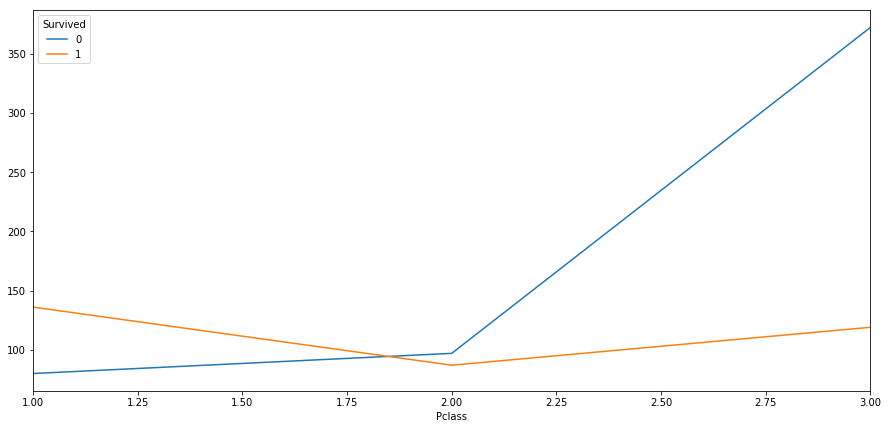

In [9]:
train.groupby(["Pclass","Survived"])["Survived"].agg("count").unstack().plot(figsize=figsize);

In [10]:
train.groupby("Sex")["Survived"].agg("count").sort_values(ascending = False)

Sex
male      577
female    314
Name: Survived, dtype: int64

In [11]:
train.groupby(["Sex","Survived"])["Survived"].agg("count")

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

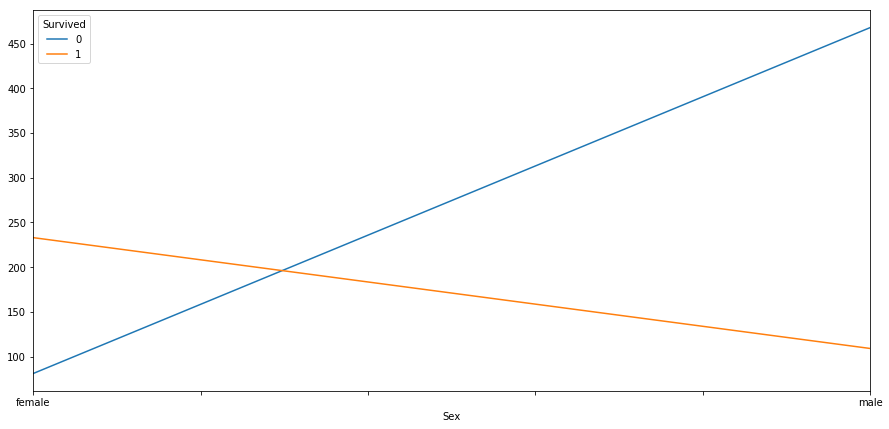

In [12]:
train.groupby(["Sex","Survived"])["Survived"].agg("count").unstack().plot(figsize=figsize);

In [13]:
train.groupby(["Survived","Sex"])["Age"].agg("mean")

Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.847716
          male      27.276022
Name: Age, dtype: float64

In [14]:
train.groupby(["SibSp","Survived"])["Survived"].agg("count")

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

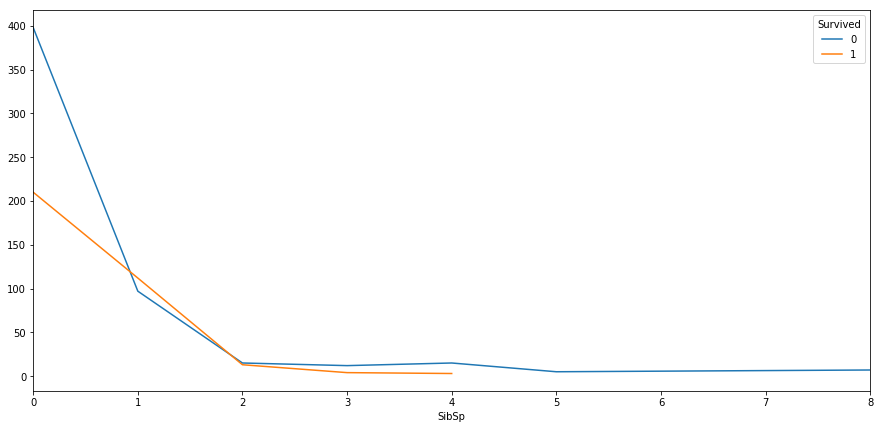

In [15]:
train.groupby(["SibSp","Survived"])["Survived"].agg("count").unstack().plot(figsize=figsize);

In [16]:
train.groupby(["Parch","Survived"])["Survived"].agg("count")

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

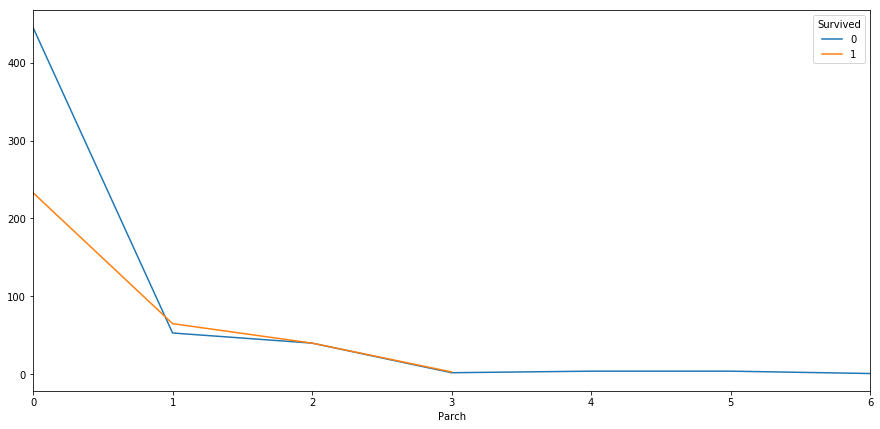

In [17]:
train.groupby(["Parch","Survived"])["Survived"].agg("count").unstack().plot(figsize=figsize);

In [18]:
train.groupby(["Embarked","Survived"])["Survived"].agg("count")

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

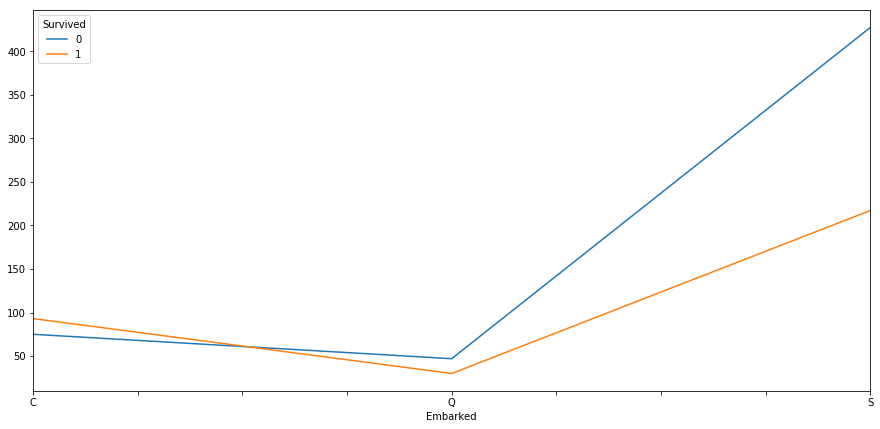

In [19]:
train.groupby(["Embarked","Survived"])["Survived"].agg("count").unstack().plot(figsize=figsize);

### Challenges

* <i>How to deal with missing values in Cabin</i><br>
The best solution in my opinion is train model only wiith data WITH Cabin, another one only WITHOUT data in Cabin, the last one with all data - check which one is better. There is no chance to fill this field in any sensible way.<br><br>
* <i>How to deal with missing values in Age</i> <br>
Fill data by mean/median per sex.<br><br>
* <i>Feature engineering<br> Take Mr, Mrs etc from name. 

# Data processing

In [20]:
def factorize_ (x):
    if x == 'Mr':
        return 0
    elif x == 'Mrs':
        return 1
    elif x == 'Miss':
        return 2
    elif x == 'Master':
        return 3
    elif x == 'Don':
        return 4
    elif x == 'Rev':
        return 5
    elif x == 'Dr':
        return 6
    elif x == 'Mme':
        return 7
    elif x == 'Ms':
        return 8
    elif x == 'Major':
        return 9
    elif x == 'Lady':
        return 10
    elif x == 'Sir':
        return 11
    elif x == 'Mlle':
        return 12
    elif x == 'Col':
        return 13
    elif x == 'Capt':
        return 14
    elif x == 'theCountess':
        return 15
    elif x == 'Jonkheer':
        return 16
    else:
        return 17

In [21]:
train["Sex"] = train.Sex.apply(lambda x: 0 if x=="male" else 1)
test["Sex"] = test.Sex.apply(lambda x: 0 if x=="male" else 1)
train["Embarked"] = train.Embarked.apply(lambda x: 0 if x=="C" else (1 if x=="Q" else 2))
test["Embarked"] = test.Embarked.apply(lambda x: 0 if x=="C" else (1 if x=="Q" else 2))
train["Name"] = train.Name.apply(lambda x: factorize_(x.split(",")[1].split(".")[0].replace(" ","")))
test["Name"] = test.Name.apply(lambda x: factorize_(x.split(",")[1].split(".")[0].replace(" ","")))
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,0,0,22.0,1,0,A/5 21171,7.2500,NaN,2
2,1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,0
3,1,3,2,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
4,1,1,1,1,35.0,1,0,113803,53.1000,C123,2
5,0,3,0,0,35.0,0,0,373450,8.0500,NaN,2


In [22]:
train.groupby(["Name","Survived"])["Survived"].agg("count").sort_values(ascending = False)

Name  Survived
0     0           436
2     1           127
1     1            99
0     1            81
2     0            55
1     0            26
3     1            23
      0            17
5     0             6
6     0             4
      1             3
12    1             2
7     1             1
15    1             1
8     1             1
9     0             1
4     0             1
9     1             1
10    1             1
11    1             1
13    0             1
      1             1
14    0             1
16    0             1
Name: Survived, dtype: int64

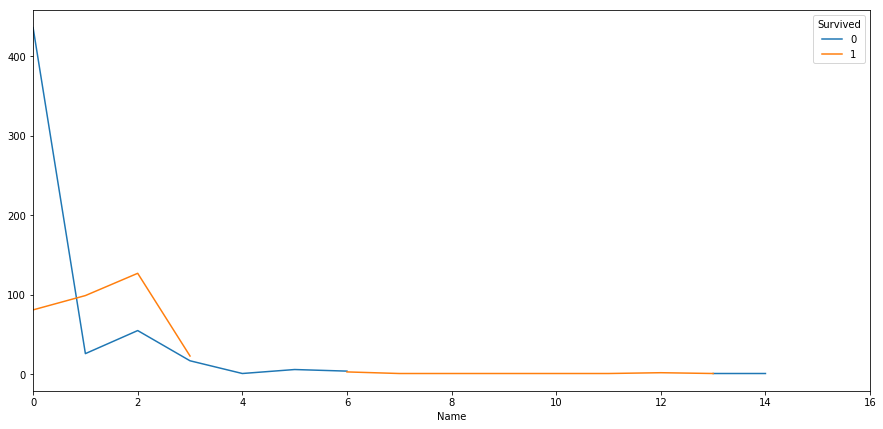

In [23]:
train.groupby(["Name","Survived"])["Survived"].agg("count").unstack().plot(figsize=figsize);

In [24]:
del train["Ticket"]
del train["Cabin"]

# Machine Learning models

In [59]:
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [34]:
columns = ["Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X_train = train[columns]
y_train = train["Survived"]
X_test = test[columns]
y_test = test["Survived"]

In [35]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(891, 8) (891,)
(418, 8) (418,)


### DummyClassifier - base model

In [51]:
base_cls = DummyClassifier()
base_rgr = DummyRegressor(strategy = "mean")

In [60]:
base_cls.fit(X_train, y_train)
base_cls_predict = base_cls.predict(X_test)
print("base_cls", mean_squared_error(y_test, base_cls_predict))

base_cls 0.495215311005


In [61]:
base_rgr.fit(X_train, y_train)
base_rgr_predict = base_rgr.predict(X_test)
print("base_rgr", mean_squared_error(y_test, base_rgr_predict))

base_rgr 0.231813080298


### Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression

In [67]:
X_train.fillna(0, inplace = True)
X_test.fillna(0, inplace = True)
lin_rgr = LinearRegression()
lin_rgr.fit(X_train, y_train)
lin_rgr_predict = lin_rgr.predict(X_test)
print("lin_rgr", mean_squared_error(y_test, lin_rgr_predict))

c:\python34\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


lin_rgr 0.0691297440078


### SVM

In [68]:
from sklearn.svm import SVR

In [72]:
svr = SVR()
svr.fit(X_train, y_train)
svr_predict = svr.predict(X_test)
print("svr", mean_squared_error(y_test, svr_predict))

svr 0.19577560942


### KNeighbors

In [73]:
from sklearn.neighbors import KNeighborsRegressor

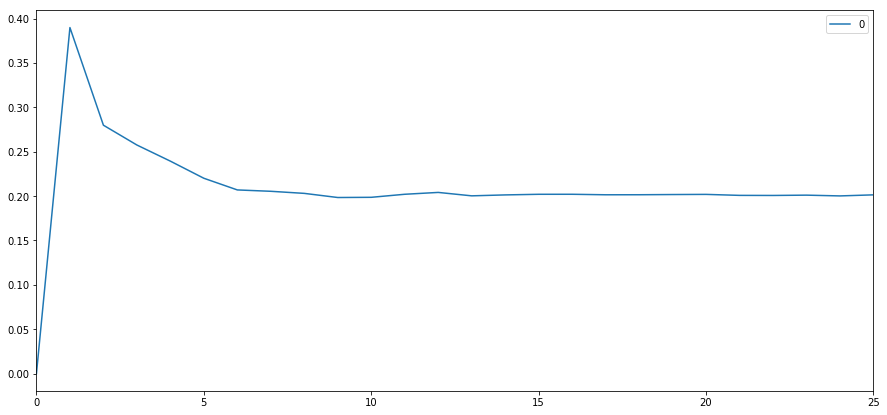

In [88]:
knn_scores = [0]
for n in range(1,26):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    knn_predict = knn.predict(X_test)
    knn_scores.append(mean_squared_error(y_test, knn_predict))

knn_scores = pd.DataFrame(knn_scores)
knn_scores.plot(figsize = figsize);


In [99]:
from sklearn import ensemble
gbr = ensemble.GradientBoostingRegressor()
gbr.fit(X_train,y_train)
gbr_predict = gbr.predict(X_test)
print("gbr", mean_squared_error(y_test, gbr_predict))

gbr 0.0943141019187


In [105]:
!pip install -e 'C:\Users\Przemek\xgboost-0.71.tar'

'C:\Users\Przemek\xgboost-0.71.tar' should either be a path to a local project or a VCS url beginning with svn+, git+, hg+, or bzr+
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [104]:
import xgboost

ImportError: No module named 'xgboost'